In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('avanti')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results/results_training/multi_class_only_HFB/"
list_documents = os.listdir(path_data)
len(list_documents)

960

In [5]:
list_df = []
for element in list_documents:
    df_data = pd.read_csv(f"{path_data}{element}")
    name_values = element.split("_exploring")[0]
    df_data['encoder'] = name_values
    list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,test_accuracy,test_f1_score,test_precision,test_recall,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.914847,0.914827,0.915235,0.914847,0.005276,0.020517,0.919399,0.919464,0.920878,0.919464,22,word2vec
1,DecisionTree,0.816594,0.816506,0.817199,0.816594,0.350740,0.006539,0.819149,0.819301,0.820203,0.819301,22,word2vec
2,Bagging,0.868996,0.868993,0.869024,0.868996,1.961219,0.008425,0.900675,0.900768,0.902102,0.900768,22,word2vec
3,RandomForest,0.934498,0.934493,0.934630,0.934498,0.933348,0.014512,0.914711,0.914769,0.915547,0.914769,22,word2vec
4,ExtraTrees,0.934498,0.934498,0.934498,0.934498,0.216557,0.015312,0.910053,0.910096,0.910847,0.910096,22,word2vec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.877729,0.877748,0.878302,0.877729,1.827806,0.009083,0.882798,0.882945,0.884640,0.882945,29,Group_7
7,XGBoost,0.884279,0.884286,0.884300,0.884279,2.266898,0.016428,0.880856,0.881076,0.883292,0.881076,29,Group_7
8,Gaussian Process,0.534934,0.417371,0.762134,0.534934,0.643136,0.094889,0.423319,0.545882,0.760764,0.545882,29,Group_7
9,Hist Gradient Boosting,0.893013,0.893027,0.893117,0.893013,4.478978,0.013156,0.886410,0.886683,0.889863,0.886683,29,Group_7


In [6]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_test = df_results[['description', 'test_accuracy', 'test_f1_score', 'test_precision',
    'test_recall', 'iteration', 'encoder']]

df_results_test.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "Iteration", "Encoder"]
df_results_test['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_test], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage
0,KNeighbors,0.919399,0.919464,0.920878,0.919464,22,word2vec,Training
1,DecisionTree,0.819149,0.819301,0.820203,0.819301,22,word2vec,Training
2,Bagging,0.900675,0.900768,0.902102,0.900768,22,word2vec,Training
3,RandomForest,0.914711,0.914769,0.915547,0.914769,22,word2vec,Training
4,ExtraTrees,0.910053,0.910096,0.910847,0.910096,22,word2vec,Training
...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.877748,0.877729,0.878302,0.877729,29,Group_7,Validating
7,XGBoost,0.884286,0.884279,0.884300,0.884279,29,Group_7,Validating
8,Gaussian Process,0.417371,0.534934,0.762134,0.534934,29,Group_7,Validating
9,Hist Gradient Boosting,0.893027,0.893013,0.893117,0.893013,29,Group_7,Validating


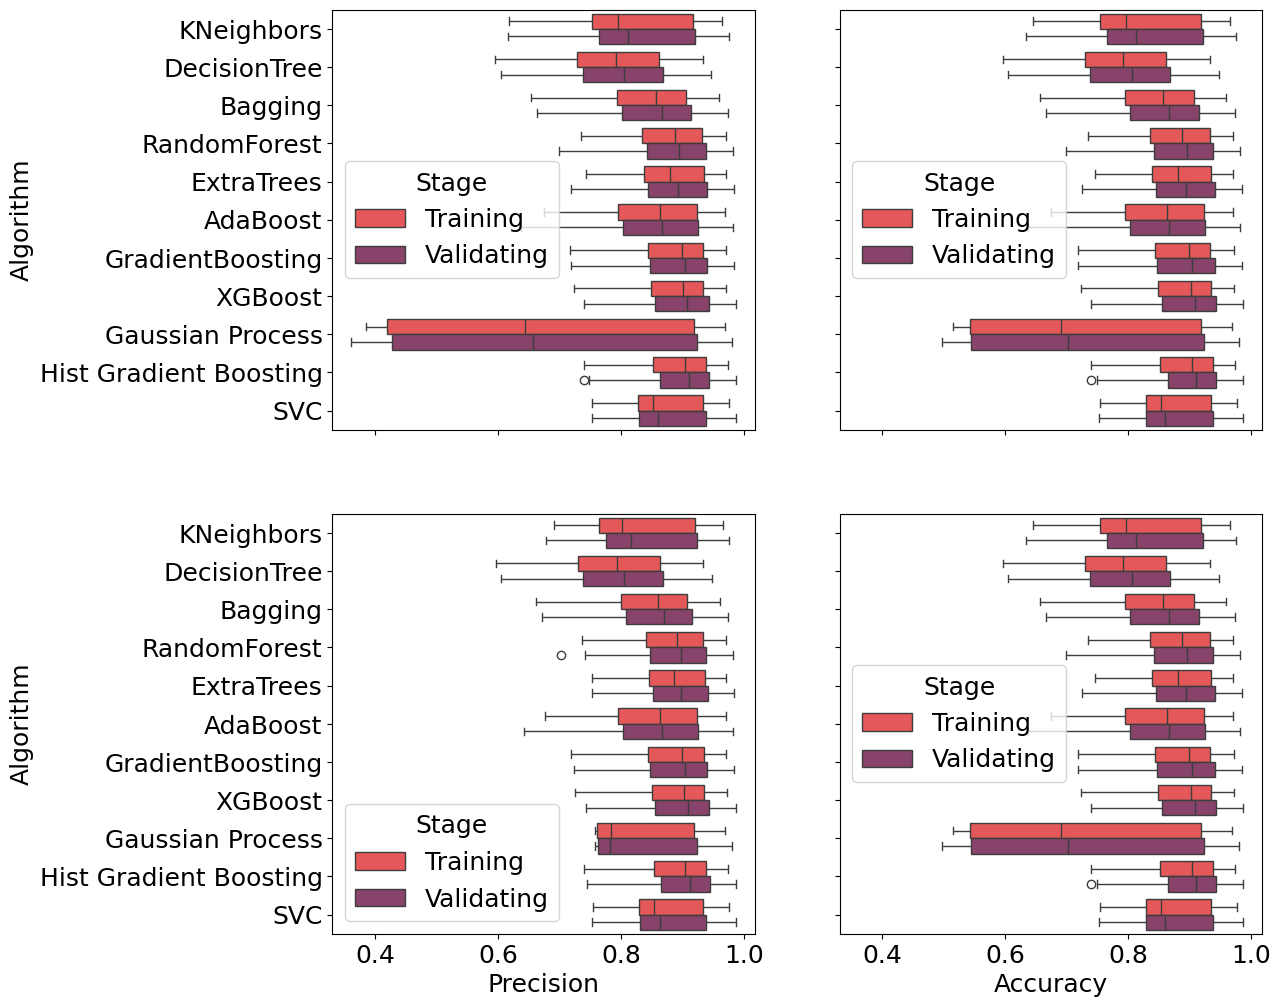

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

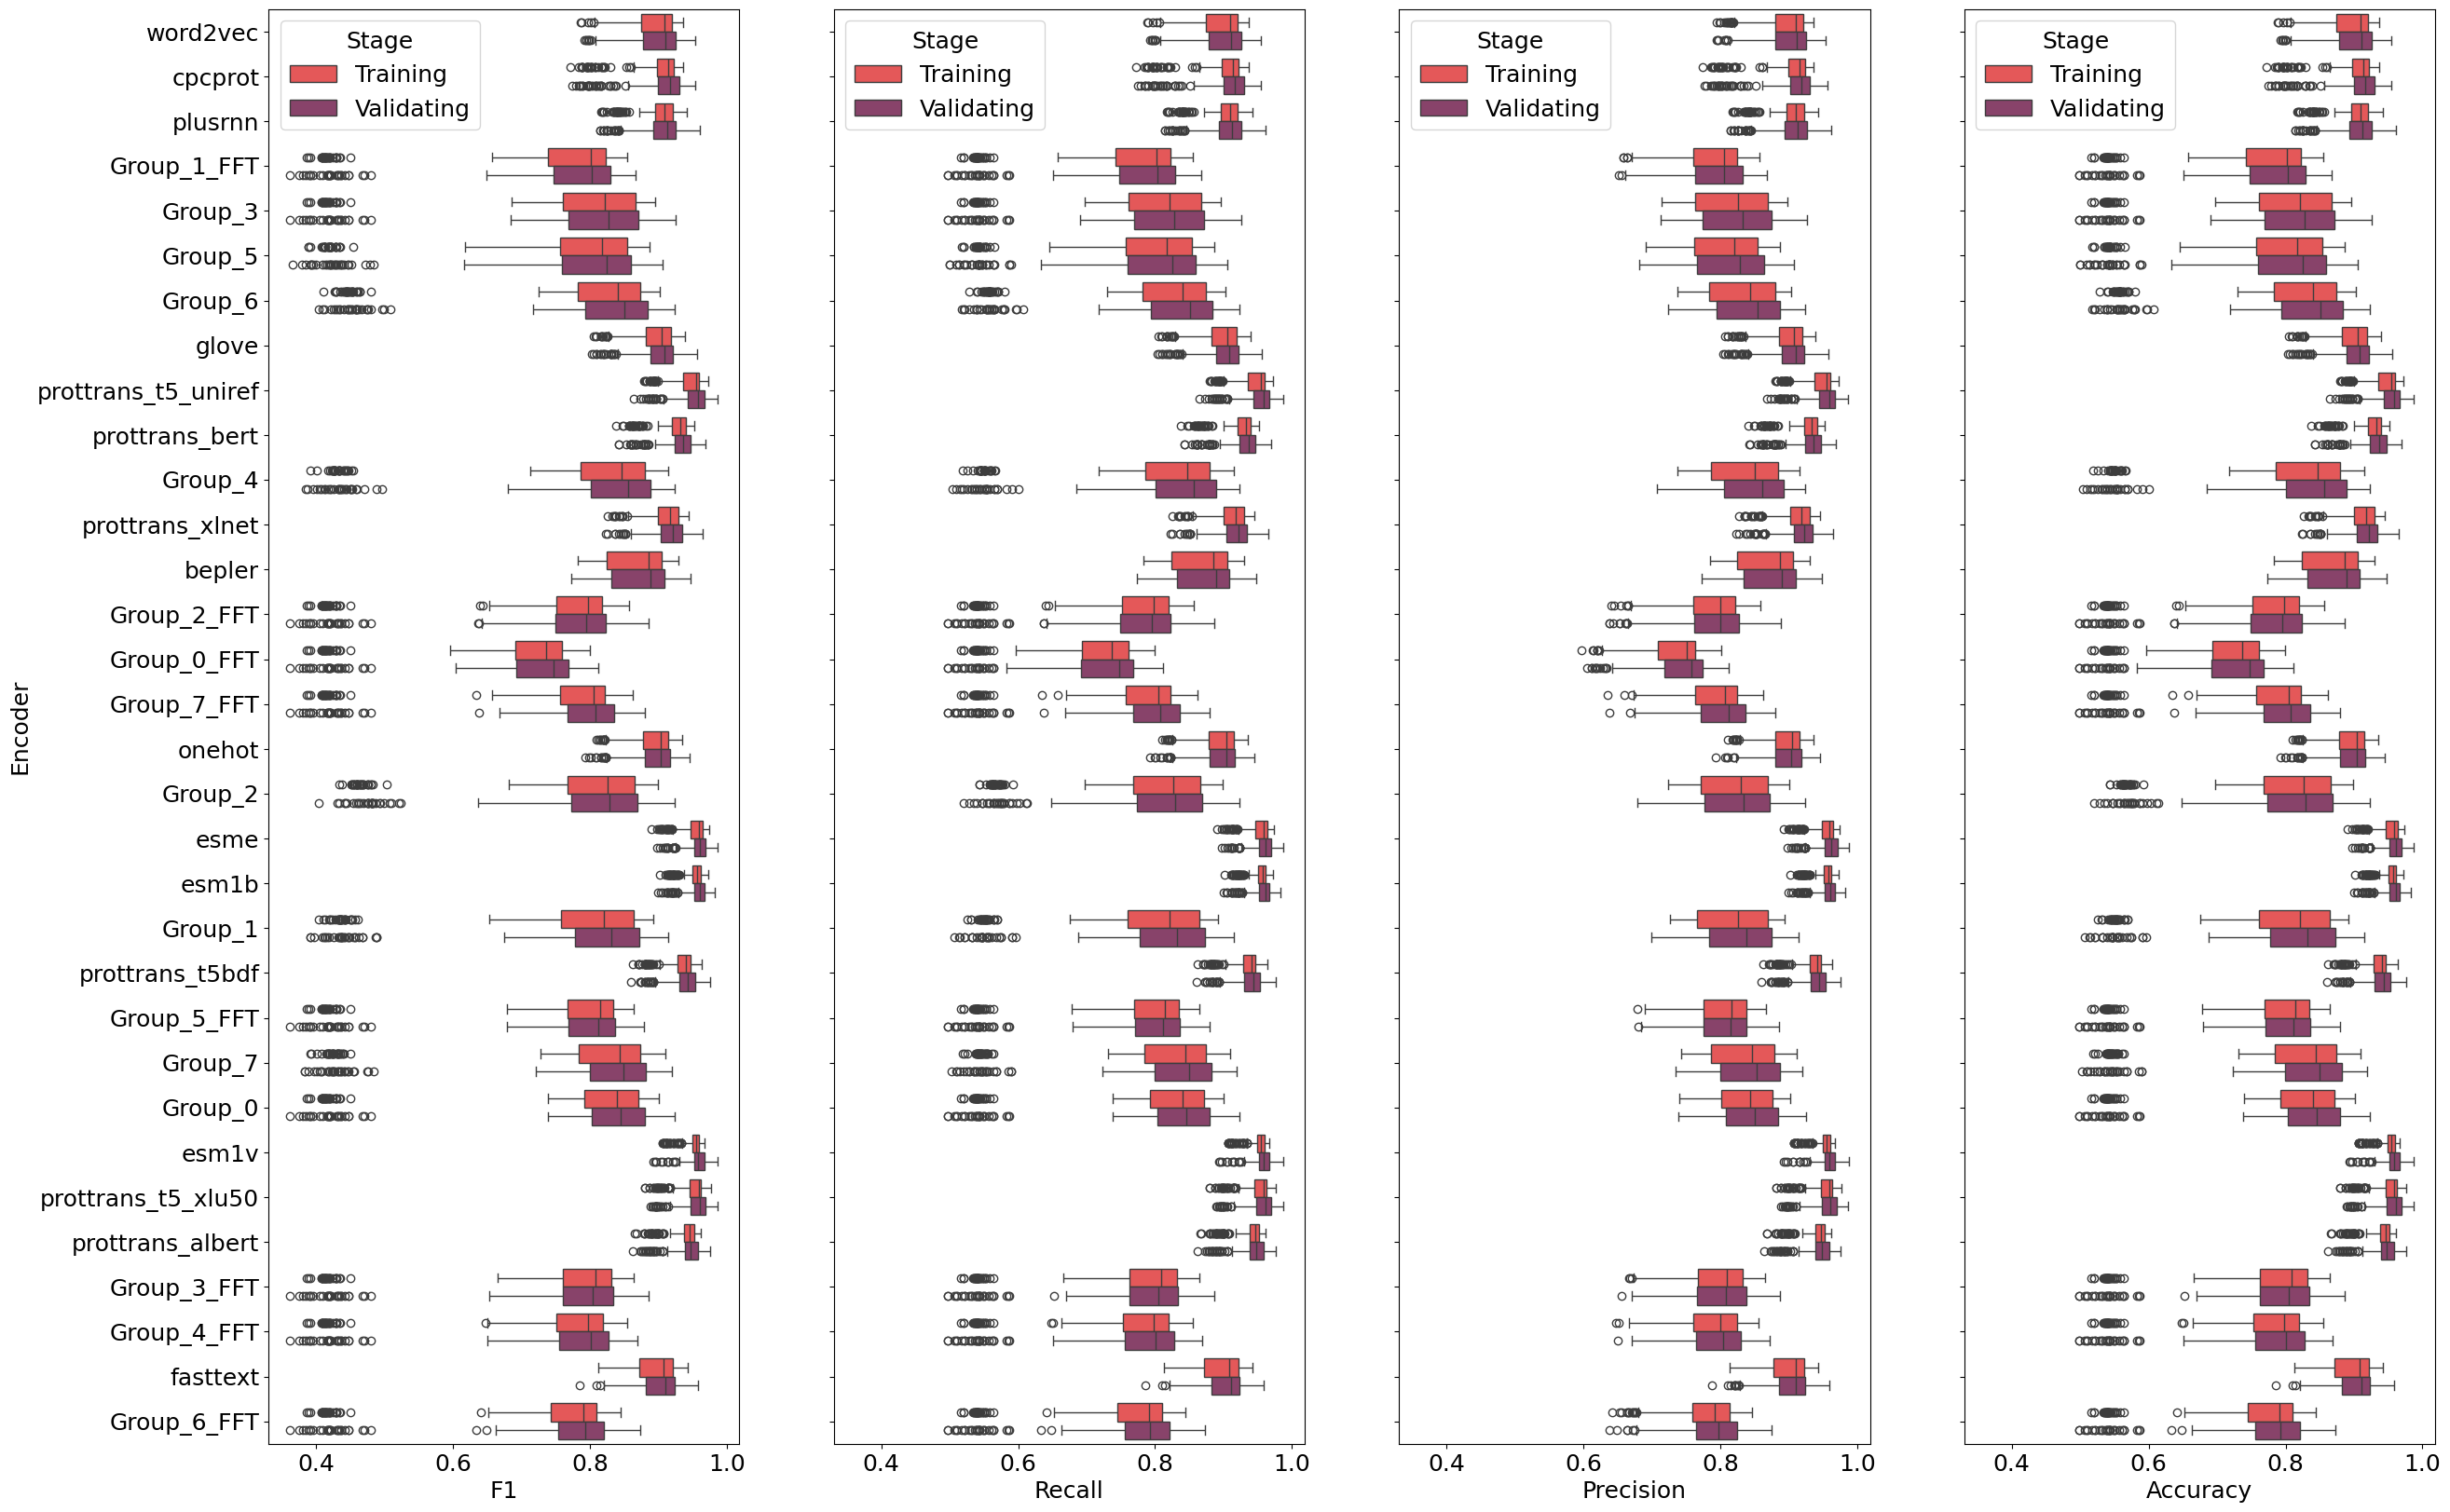

In [8]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

In [9]:
selection_instance = SelectionMethod()
selection_instance.select(15, df_results_train, df_results_test)

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
114,ExtraTrees,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
115,ExtraTrees,esm1v,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
180,GradientBoosting,esme,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
276,RandomForest,esme,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
315,SVC,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
316,SVC,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
348,XGBoost,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16


In [14]:
df_concat[(df_concat["Algorithm"] == "XGBoost") & (df_concat["Encoder"] == "prottrans_t5_xlu50")].describe()

,F1,Recall,Precision,Accuracy,Iteration
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.962728,0.962739,0.963221,0.962739,15.900000
std,0.006673,0.006669,0.006553,0.006669,9.628172
min,0.947518,0.947598,0.948021,0.947598,1.000000
25%,0.958784,0.958805,0.959729,0.958805,8.000000
50%,0.962058,0.962079,0.962664,0.962079,15.500000
75%,0.966514,0.966533,0.967001,0.966533,23.000000
max,0.978166,0.978166,0.978202,0.978166,42.000000
